In [1]:
import sys
dirname = '/Users/muhammaddaffarobani/Documents/personal_research/smt'
if dirname not in sys.path:
    sys.path.append(dirname)

import matplotlib.pyplot as plt
import numpy as np
import time

from smt.problems import MixedCantileverBeam
from smt.utils.design_space import (
    DesignSpace,
    FloatVariable,
    CategoricalVariable,
)

from sklearn.metrics import mean_squared_error

from smt.applications.explainability_tools import (
    partial_dependence, 
    PartialDependenceDisplay, 
    PDFeatureImportanceDisplay, 
    PDFeatureInteractionDisplay,
    ShapFeatureImportanceDisplay,
    ShapDisplay,
    ShapDisplay2,
)
from smt.surrogate_models import (
    KPLS,
    MixIntKernelType,
    MixHrcKernelType,
)
from smt.applications.mixed_integer import MixedIntegerKrigingModel

In [2]:
ndoe = 750
n_train = int(0.8 * ndoe)
fun = MixedCantileverBeam()
# Name of the features
feature_names = [r'$\tilde{I}$', r'$L$', r'$S$']
# Index for categorical features
categorical_feature_indices = [0]
# Design space
ds = DesignSpace([
    CategoricalVariable(values=[str(i + 1) for i in range(12)]),
    FloatVariable(10.0, 20.0),
    FloatVariable(1.0, 2.0),
])
# create mapping for the categories
categories_map = dict()
inverse_categories_map = dict()
for feature_idx in categorical_feature_indices:
    categories_map[feature_idx] = {
        i: value for i, value in enumerate(ds._design_variables[feature_idx].values)
    }
    inverse_categories_map[feature_idx] = {
        value: i for i, value in enumerate(ds._design_variables[feature_idx].values)
    }

X = fun.sample(ndoe)
y = fun(X)

X_tr, y_tr = X[:n_train, :], y[:n_train]
X_te, y_te = X[n_train:, :], y[n_train:]

class GroundTruthModel:
    def predict_values(self, X):
        return fun(X)
    
print("Ground truth model")
gtm = GroundTruthModel()
y_pred = gtm.predict_values(X_te)
rmse = mean_squared_error(y_te, y_pred, squared=False)
rrmse = rmse / y_te.mean()
print(f"RMSE: {rmse:.4f}")
print(f"rRMSE: {rrmse:.4f}")

Ground truth model
RMSE: 0.0000
rRMSE: 0.0000


In [3]:
# sm = MixedIntegerKrigingModel(
#     surrogate=KPLS(
#         design_space=ds,
#         categorical_kernel=MixIntKernelType.HOMO_HSPHERE,
#         hierarchical_kernel=MixHrcKernelType.ARC_KERNEL,
#         theta0=np.array([4.43799547e-04, 4.39993134e-01, 1.59631650e+00]),
#         corr="squar_exp",
#         n_start=1,
#         cat_kernel_comps=[2],
#         n_comp=2,
#         print_global=False,
#         ),
#     )


# start_time = time.time()
# sm.set_training_values(X_tr, np.array(y_tr))
# sm.train()
# print("run time (s):", time.time() - start_time)

# print("Surrogate model")
# y_pred = sm.predict_values(X_te)
# rmse = mean_squared_error(y_te, y_pred, squared=False)
# rrmse = rmse / y_te.mean()
# print(f"RMSE: {rmse:.4f}")
# print(f"rRMSE: {rrmse:.4f}")

In [4]:
# def cantilever_deflection(x):
#     norm_inertia_vals = [
#         0.0833, 0.139, 0.380, 0.0796,
#         0.133, 0.363, 0.0859, 0.136,
#         0.360, 0.0922, 0.138, 0.369,
#     ]
    
#     I = int(x[0])
#     L = x[1]
#     S = x[2]
#     norm_inertia = norm_inertia_vals[I]

#     E = 200e9
#     P = 50e3

#     y = (P * L**3) / (3 * E * S**2 * norm_inertia)

#     return y

# def cantilever_deflection_vectorized(X):
#     y = np.zeros(X.shape[0])
#     for i in range(X.shape[0]):
#         y[i] = cantilever_deflection(X[i, :])
#     return y

# class GroundTruthModel2:
#     def predict_values(self, X):
#         return cantilever_deflection_vectorized(X)
    
# """Problem definition"""
# # Design space
# ds = DesignSpace([
#     # CategoricalVariable([
#     #     "type_A", "type_B", "type_C", "type_D", 
#     #     "type_E", "type_F", "type_G", "type_H", 
#     #     "type_I", "type_J", "type_K", "type_L",
#     # ]),
#     CategoricalVariable([
#         "A", "B", "C", "D", 
#         "E", "F", "G", "H", 
#         "I", "J", "K", "L",
#     ]),
#     FloatVariable(10.0, 20.0),
#     FloatVariable(1.0, 2.0),
# ])

# f_obj = cantilever_deflection
# gtm2 = GroundTruthModel2()

In [5]:
# # Objective function
# def cantilever_deflection(x):
#     norm_inertia_vals = [
#         0.0833, 0.139, 0.380, 0.0796,
#         0.133, 0.363, 0.0859, 0.136,
#         0.360, 0.0922, 0.138, 0.369,
#     ]
    
#     I = int(x[0])
#     L = x[1]
#     S = x[2]
#     norm_inertia = norm_inertia_vals[I]

#     E = 200e9
#     P = 50e3

#     y = (P * L**3) / (3 * E * S**2 * norm_inertia)

#     return y

# def cantilever_deflection_vectorized(X):
#     y = np.zeros(X.shape[0])
#     for i in range(X.shape[0]):
#         y[i] = cantilever_deflection(X[i, :])
#     return y

# class GroundTruthModel:
#     def predict_values(self, X):
#         return cantilever_deflection_vectorized(X)
    
# """Problem definition"""
# # Design space
# ds = DesignSpace([
#     # CategoricalVariable([
#     #     "type_A", "type_B", "type_C", "type_D", 
#     #     "type_E", "type_F", "type_G", "type_H", 
#     #     "type_I", "type_J", "type_K", "type_L",
#     # ]),
#     CategoricalVariable([
#         "A", "B", "C", "D", 
#         "E", "F", "G", "H", 
#         "I", "J", "K", "L",
#     ]),
#     FloatVariable(10.0, 20.0),
#     FloatVariable(1.0, 2.0),
# ])
# categorical_feature_idx = [0]

# f_obj = cantilever_deflection

# # Create training and testing data
# n_data = 250
# n_train = int(0.8 * n_data)
# n_test = n_data - n_train
# xdoe, _ = ds.sample_valid_x(n_data)
# y_doe = [f_obj(xdoe[i]) for i in range(len(xdoe))]

# x_ref, _ = ds.sample_valid_x(1000)
# y_ref = [f_obj(x_ref[i]) for i in range(len(x_ref))]
# X_ref = np.array(x_ref)
# y_ref = np.array(y_ref)

# X_tr, y_tr = xdoe[:n_train, :], y_doe[:n_train]
# X_te, y_te = xdoe[n_train:, :], y_doe[n_train:]
# y_tr, y_te = np.array(y_tr), np.array(y_te)

# # Name of the features
# feature_names = [r'$\tilde{I}$', r'$L$', r'$S$']

# # create mapping for the categories
# categories_map = dict()
# inverse_categories_map = dict()
# for feature_idx in categorical_feature_idx:
#     categories_map[feature_idx] = {
#         i: value for i, value in enumerate(ds._design_variables[feature_idx].values)
#     }
#     inverse_categories_map[feature_idx] = {
#         value: i for value, i in enumerate(ds._design_variables[feature_idx].values)
#     }

# """Modelling"""
# print("Ground truth model")
# gtm = GroundTruthModel()
# y_pred = gtm.predict_values(X_te)
# rmse = mean_squared_error(y_te, y_pred, squared=False)
# rrmse = rmse / y_te.mean()
# print(f"RMSE: {rmse:.4f}")
# print(f"rRMSE: {rrmse:.4f}")

# PD

## Feature importance

In [6]:
model = gtm
x = X_tr
pdd_importance = PDFeatureImportanceDisplay.from_surrogate_model(
    model, x, feature_names=feature_names, categorical_feature_indices=categorical_feature_indices
)

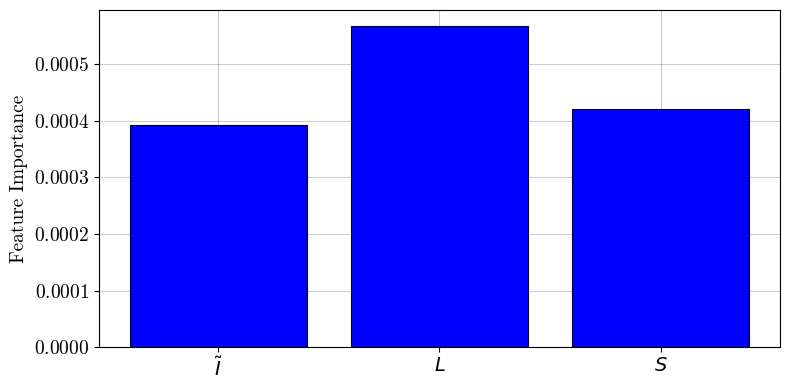

In [7]:
pdd_importance.plot(figsize=[8, 4])

## Basic functionalities

In [8]:
%%time
model = gtm
X = X_tr
features = [i for i in range(X_tr.shape[1])]
features += [(1, 2)]

pdd = PartialDependenceDisplay.from_surrogate_model(
    model, 
    X, 
    features, 
    categorical_feature_indices=categorical_feature_indices, 
    feature_names=feature_names,
    grid_resolution=20,
    kind='both',
    categories_map=categories_map,
    )

CPU times: user 229 ms, sys: 5.78 ms, total: 235 ms
Wall time: 80.5 ms


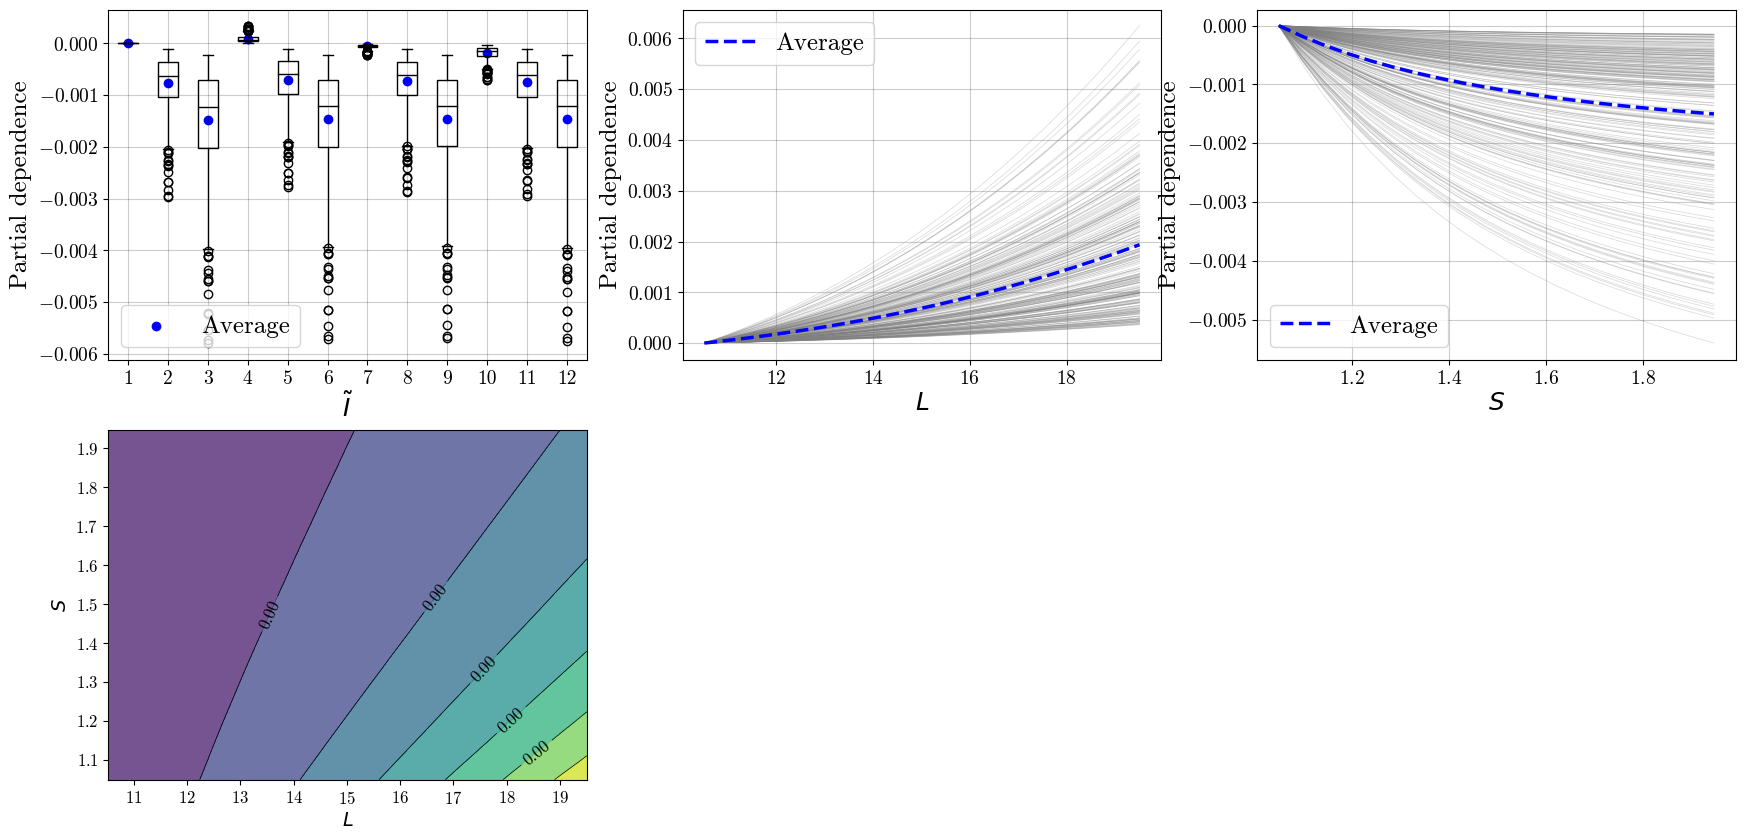

In [9]:
pdd.plot(centered=True)

In [3]:
%%time
model = gtm
X = X_tr
features = [(0, 1)]

pdd_2 = PartialDependenceDisplay.from_surrogate_model(
    model, 
    X, 
    features, 
    categorical_feature_indices=categorical_feature_indices, 
    feature_names=feature_names,
    grid_resolution=10,
    kind='both',
    categories_map=categories_map,
    )

CPU times: user 36.2 ms, sys: 3.81 ms, total: 40.1 ms
Wall time: 40 ms


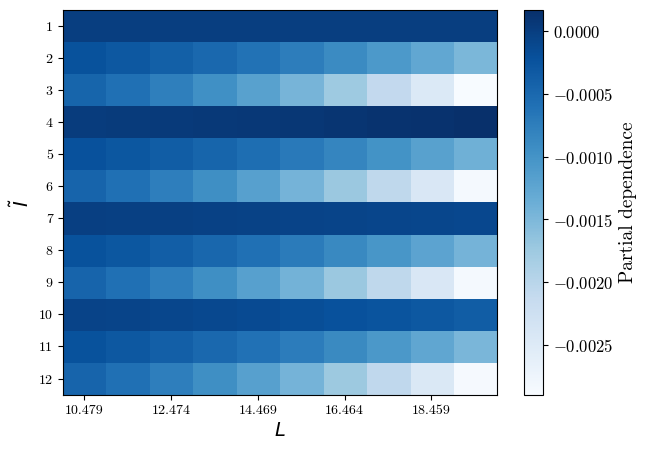

In [4]:
pdd_2.plot(centered=True)

# SHAP

## Feature importance

In [12]:
model = gtm
x = X_tr
shap_importance = ShapFeatureImportanceDisplay.from_surrogate_model(
    model, x, feature_names=feature_names, categorical_feature_indices=categorical_feature_indices
)

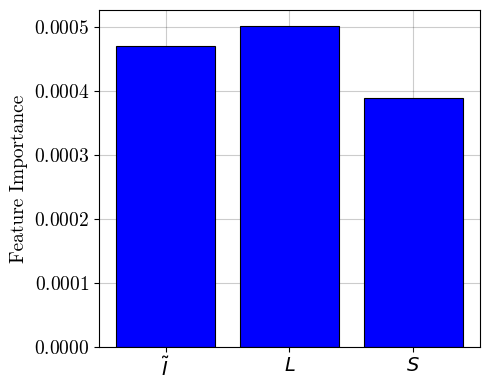

In [13]:
shap_importance.plot()

## Plots

In [14]:
%%time
instances = X_tr
model = gtm
X = X_tr
explainer_train = ShapDisplay2.from_surrogate_model(
    instances, 
    model, 
    X, 
    feature_names=feature_names,
    categorical_feature_indices=categorical_feature_indices,
    categories_map=categories_map
)

CPU times: user 340 ms, sys: 7.38 ms, total: 347 ms
Wall time: 121 ms


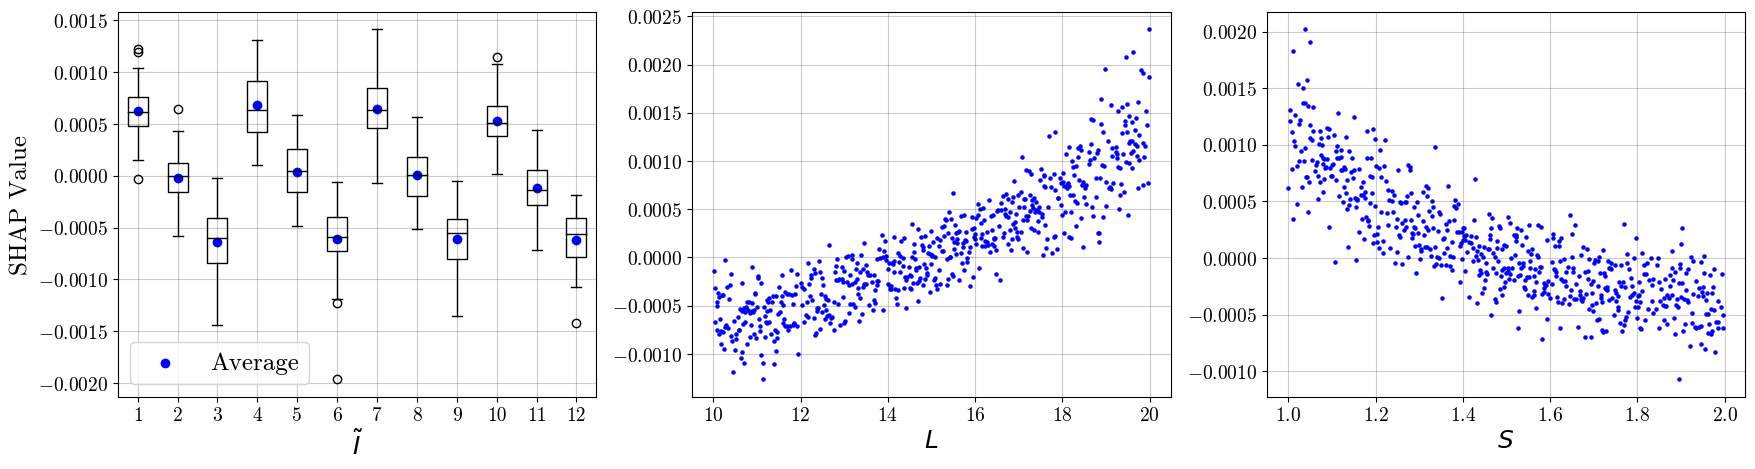

In [15]:
shap_dependence = explainer_train.dependence_plot([0, 1, 2], sort_based_on_importance=False)

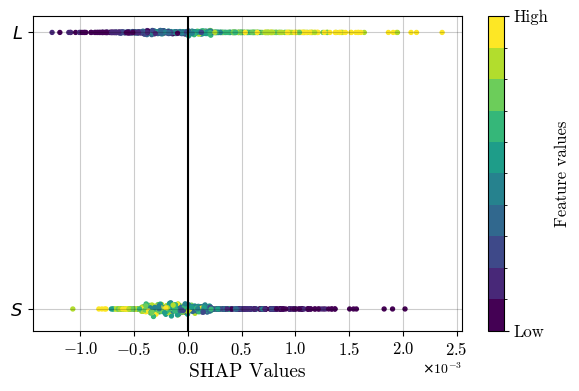

In [16]:
explainer_train.summary_plot()

CPU times: user 406 ms, sys: 15.5 ms, total: 422 ms
Wall time: 146 ms


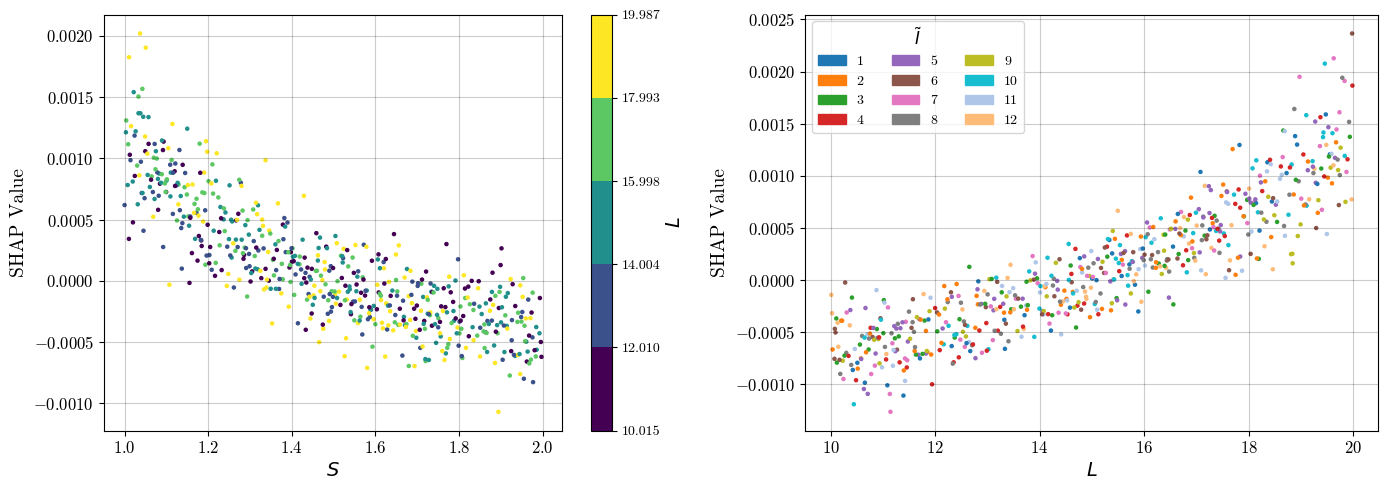

In [17]:
%%time
feature_pairs = [(2, 1), (1, 0)]
explainer_train.interaction_plot(
    feature_pairs, 
    n_color=5,
    sort_based_on_importance={0: False},
)